## HW 4

## Solution 5.1

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
from shapely.geometry import box
import geopandas as gpd

#1 
base_path = os.path.join("data")
JENI_path = os.path.join(base_path, "Justice_Equity_Need_Index.geojson")
JENI = gpd.read_file(JENI_path)

In [15]:
JENI.head()

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [19]:
JENI_1 = JENI['sup_dist']
JENI_dbd = JENI.dissolve(by='sup_dist', aggfunc='mean')

/opt/tljh/user/lib/python3.9/site-packages/geopandas/geodataframe.py:1676: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


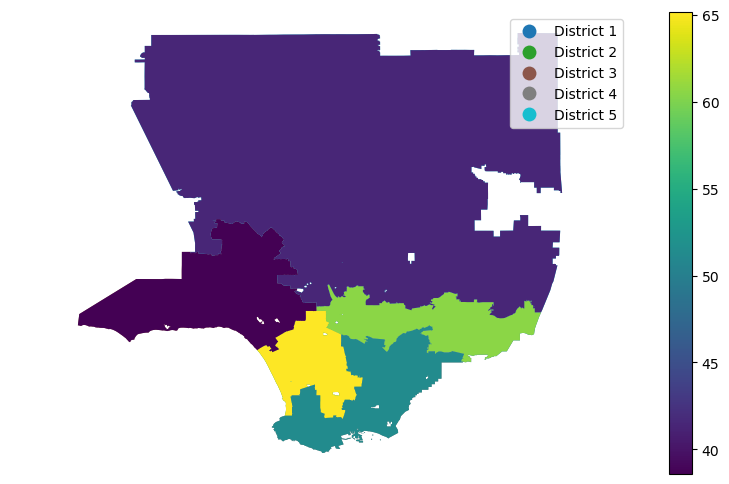

In [23]:
#2 
fig, ax = plt.subplots(figsize=(10, 6))
JENI_dbd.reset_index().plot(column='sup_dist',
                            legend=True,
                            ax=ax)
JENI_dbd.reset_index().plot(column='jenipctl',
                            legend=True,
                            ax=ax)
ax.set_axis_off()
plt.axis('equal')
ax.get_legend()
plt.show() 

#3 Caption: This map indicates various districts in need within the county of Los Angeles, CA. The color gradient shows the Justice Equity Need Index, where the higher percentiles need the most community healing, health, and prevention.

## Solution for 5.2

In [25]:
#1 You should always make sure they're the same file types

base_path = os.path.join("data")
LB_path = os.path.join(base_path, "LB_City_Boundary.geojson")
LB = gpd.read_file(LB_path)
LB.head()

,OBJECTID,CITYNAME,CITYCODE,SHAPE_Length,SHAPE_Area,geometry
0,1,LONG BEACH,CLB,1.232684,0.01338,"MULTIPOLYGON (((-118.18175 33.88555, -118.1817..."


In [26]:
LB_clip = gpd.clip(JENI, LB)
LB_clip.crs = JENI.crs
LB_clip.head()

/opt/tljh/user/lib/python3.9/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
99,100,90803,Low,35.500000,179,High,67.699997,Low,30.100000,Low,25.700001,Long Beach,District 4,SPA 8 - South Bay,None,0.212855,0.001239,"POLYGON ((-118.11220 33.77536, -118.11173 33.7..."
92,93,90815,Low,33.300000,185,Highest,85.699997,Low,27.600000,Lowest,13.800000,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.269965,0.001763,"POLYGON ((-118.13370 33.81059, -118.13325 33.8..."
85,86,90808,Low,30.800000,192,High,60.599998,Low,36.599998,Lowest,16.700001,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.231759,0.001708,"POLYGON ((-118.12511 33.84634, -118.12511 33.8..."
149,150,90716,Moderate,52.900002,131,Lowest,6.500000,High,67.400002,Highest,82.599998,Hawaiian Gardens,District 4,SPA 7 - East,City of Hawaiian Gardens,0.078456,0.000241,"MULTIPOLYGON (((-118.06471 33.82403, -118.0657..."
71,72,90713,Low,25.700001,206,Low,33.000000,Low,31.500000,Low,25.400000,Lakewood,District 4,SPA 7 - East,City of Lakewood,0.142398,0.000881,"POLYGON ((-118.09419 33.83188, -118.09493 33.8..."


In [27]:
base_path = os.path.join("data")
LB_NB_path = os.path.join(base_path, "LB_Neighborhoods.geojson")
LB_NB = gpd.read_file(LB_NB_path)
LB_NB.head()

,OBJECTID,NEIGHBOR_NAME,GlobalID,created_user,created_date,last_edited_user,last_edited_date,SHAPE_Length,SHAPE_Area,geometry
0,1,East Village,{F64F07BE-5FA5-410D-88C1-B66CA53D38DF},None,NaT,None,NaT,0.033715,0.000069,"MULTIPOLYGON (((-118.18702 33.77534, -118.1863..."
1,2,Bluff Heights,{99E88FB4-E7F9-4AC3-B341-AB8E56AE9A31},None,NaT,None,NaT,0.041252,0.000067,"MULTIPOLYGON (((-118.15569 33.77171, -118.1545..."
2,3,Stoney Brook,{09F3E3ED-8CA1-41C5-AD87-1B1E2EEA7231},None,NaT,None,NaT,0.012744,0.000009,"MULTIPOLYGON (((-118.12099 33.77406, -118.1197..."
3,4,Bluff Park,{B817207F-7E13-47F8-BF14-41EB6EEC6AD8},None,NaT,None,NaT,0.041761,0.000066,"MULTIPOLYGON (((-118.15353 33.76444, -118.1524..."
4,5,CSULB,{34BB6FE3-315A-4B47-8578-DF606C9FDFA0},None,NaT,None,NaT,0.059820,0.000176,"MULTIPOLYGON (((-118.10798 33.78870, -118.1079..."


In [28]:
LB_joined = gpd.sjoin(LB_NB, 
                         LB_clip, 
                         how="inner", 
                         predicate='intersects')
LB_joined.head()

,OBJECTID_left,NEIGHBOR_NAME,GlobalID,created_user,created_date,last_edited_user,last_edited_date,SHAPE_Length_left,SHAPE_Area_left,geometry,...,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length_right,SHAPE_Area_right
0,1,East Village,{F64F07BE-5FA5-410D-88C1-B66CA53D38DF},None,NaT,None,NaT,0.033715,0.000069,"MULTIPOLYGON (((-118.18702 33.77534, -118.1863...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
5,6,Willmore,{1ACDFFF5-68A5-4A02-B766-9B9546CA4DFE},None,NaT,None,NaT,0.037115,0.000075,"MULTIPOLYGON (((-118.20467 33.77650, -118.2046...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
38,39,Saint Mary's,{08EF8122-27A6-493C-AFB6-2CAAFAC9CD01},None,NaT,None,NaT,0.044193,0.000106,"MULTIPOLYGON (((-118.18939 33.78259, -118.1886...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
39,40,Rose Park,{AEE872EB-E17F-47B4-B670-23F5ED5E08EA},None,NaT,None,NaT,0.044998,0.000111,"MULTIPOLYGON (((-118.16550 33.77898, -118.1644...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
40,41,West Village,{CE22A43B-FF85-4988-8965-0698278FC88F},None,NaT,None,NaT,0.035150,0.000067,"MULTIPOLYGON (((-118.20314 33.77559, -118.2023...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523


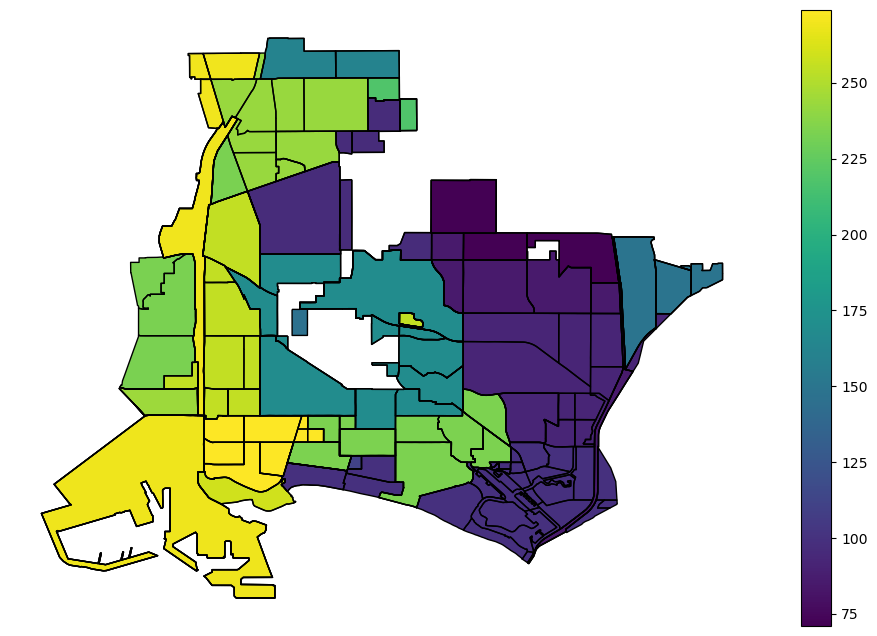

In [30]:
# 3 Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

LB_joined.plot(alpha=1,
                    facecolor="none",
                    edgecolor="black",
                    zorder=10,
                    ax=ax)

LB_joined.plot(column='index_right',
                  ax=ax,
                  legend=True)

leg = ax.get_legend()
#leg.set_bbox_to_anchor((1.15,1))

ax.set_axis_off()
plt.axis('equal')
plt.show()

#3 Caption: This map shows Justice Equity Need Index for the city of Long Beach, CA. Specifically, the different neighborhoods have been ranked by percentiles for need.

## Solution for 5.3

In [85]:
#1
zipcodes = JENI[["zip", "csa","geometry"]]
zipcodes.head()

,zip,csa,geometry
0,91108,City of San Marino,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,90631,City of La Habra Heights,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,90274,City of Rancho Palos Verdes,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,91361,City of Westlake Village,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,90275,City of Rancho Palos Verdes,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [74]:
df = pd.DataFrame({'longitude': [-118.4170], 'latitude': [33.9710]})

In [77]:
geometry = gpd.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326")

In [79]:
df3857  = geometry.to_crs(3857)
df3857.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [204]:
#3 had to go back to part 1 and add geometry column
zipcodes_point = zipcodes["geometry"].centroid
type(zipcodes_point)

# Yes, I received a warning which states the centroid is likely 
# incorrect because of the different projections you can do, but you can continue on 

/tmp/ipykernel_67021/3565086183.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zipcodes_point = zipcodes["geometry"].centroid


geopandas.geoseries.GeoSeries

In [118]:
zipcodes_point

0      POINT (-118.11364 34.12237)
1      POINT (-117.95078 33.95981)
2      POINT (-118.36846 33.77734)
3      POINT (-118.83252 34.13044)
4      POINT (-118.36413 33.75576)
                  ...             
276    POINT (-118.28745 34.00308)
277    POINT (-118.27400 33.92033)
278    POINT (-118.24959 33.92567)
279    POINT (-118.25179 34.04302)
280    POINT (-118.23915 34.02903)
Length: 281, dtype: geometry

In [115]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    
    Distance in kilometers that will be stored in 'target_col'.
    """
    
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

In [167]:
dists

[0.00033903045398664573,
 0.00046635272622467155,
 0.00019964830387268274,
 0.00044505889786222865,
 0.0002216357678428216,
 0.0001400952874636754,
 0.0002010057489651256,
 8.86121349677444e-06,
 0.0004009547797850518,
 0.0001378782127745352,
 0.00034831014131798894,
 0.0002341746089311044,
 0.0006050193568829473,
 0.00036780939376654414,
 8.39675927054744e-05,
 0.0005660077317393339,
 0.00016780450582087598,
 0.00042407093730677004,
 0.0003838342346966003,
 0.0004977474181686365,
 0.00010378162372684989,
 0.00030434456743443186,
 0.00035793830997804413,
 0.00010773057131848589,
 0.0004232408203872273,
 0.000509468759379084,
 3.204869435584617e-05,
 0.0003229289760837186,
 0.0002844952103901012,
 0.0002941646108457881,
 0.0003116468073083446,
 0.00029457640008597407,
 0.0002661765747289949,
 0.00045229590982679893,
 0.0003632290650540677,
 0.00042542559121626784,
 0.0005564109748075299,
 0.000144265103964142,
 0.0004687793697187233,
 0.00013129568303843408,
 0.0003840847206975669,
 0.0

In [189]:
#4 i didn't understand what you did exactly so i made it easier for myself i hope that's okay

dists = []
for i in range(len(zipcodes)):
    d = (zipcodes["geometry"].centroid)[i].distance(geometry[0])
    d = d/1000
    dists.append(d)

/tmp/ipykernel_67021/3863079942.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  d = (zipcodes["geometry"].centroid)[i].distance(geometry[0])
/tmp/ipykernel_67021/3863079942.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  d = (zipcodes["geometry"].centroid)[i].distance(geometry[0])
/tmp/ipykernel_67021/3863079942.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  d = (zipcodes["geometry"].centroid)[i].distance(geometry[0])
/tmp/ipykernel_67021/3863079942.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeri

In [197]:
#5 the max is 0.0009187607979342016 and it's zipcode 93535

In [198]:
dists.index(np.max(dists))

256

In [199]:
np.max(dists)

0.0009187607979342016

In [200]:
zipcodes.iloc[256]

zip                                                     93535
csa                                 Unincorporated - Hi Vista
geometry    (POLYGON ((-117.82709392199996 34.616490070000...
dists                                                0.000919
Name: 256, dtype: object

In [203]:
# average distance
np.mean(dists)

0.00029189706188745463